In [5]:
import os
import numpy as np
import pandas as pd

df = pd.read_csv("/workspaces/BioRiskEval/attack/data/ft_dataset/ncbi_virus_full.csv")
df


/tmp/ipykernel_2153205/251638286.py:5: DtypeWarning: Columns (2,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/workspaces/BioRiskEval/attack/data/ft_dataset/ncbi_virus_full.csv")


,Accession,GenBank_RefSeq,Assembly,Organism_Name,Species,Genus,Family,Genotype,Isolate,Length,Geo_Location,Molecule_type
0,PP902194.1,GenBank,NaN,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus pandemicum,Betacoronavirus,Coronaviridae,NaN,hCoV-19-Brazil-RS-rBB-COV-022,29812,Brazil,ssRNA(+)
1,PP902195.1,GenBank,NaN,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus pandemicum,Betacoronavirus,Coronaviridae,NaN,hCoV-19-Brazil-RS-rBB-COV-025,29831,Brazil,ssRNA(+)
2,PP902196.1,GenBank,NaN,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus pandemicum,Betacoronavirus,Coronaviridae,NaN,hCoV-19-Brazil-RS-rBB-COV-028,29823,Brazil,ssRNA(+)
3,PP902197.1,GenBank,NaN,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus pandemicum,Betacoronavirus,Coronaviridae,NaN,hCoV-19-Brazil-RS-rBB-COV-029,29826,Brazil,ssRNA(+)
4,PP902198.1,GenBank,NaN,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus pandemicum,Betacoronavirus,Coronaviridae,NaN,hCoV-19-Brazil-RS-rBB-COV-030,29830,Brazil,ssRNA(+)
...,...,...,...,...,...,...,...,...,...,...,...,...
12141653,Y00269.1,GenBank,set:Y00269,Human immunodeficiency virus 2,Human immunodeficiency virus 2,Lentivirus,Retroviridae,NaN,NaN,312,NaN,ssRNA-RT
12141654,K01139.1,GenBank,set:a4610c5034a51bd1af240edb6f3209215db98bcf,Influenza B virus (B/Singapore/222/79),Betainfluenzavirus influenzae,Betainfluenzavirus,Orthomyxoviridae,NaN,NaN,1838,NaN,ssRNA(-)
12141655,X05291.1,GenBank,set:X05291,Human immunodeficiency virus 2,Human immunodeficiency virus 2,Lentivirus,Retroviridae,NaN,NaN,9671,NaN,ssRNA-RT
12141656,X04415.1,GenBank,set:X04415,Human immunodeficiency virus 1,Human immunodeficiency virus 1,Lentivirus,Retroviridae,NaN,NaN,9229,NaN,ssRNA-RT


In [6]:
# Check the number of unique organism names and total rows
print(f"Total rows: {len(df)}")
print(f"Unique organism names: {df['Organism_Name'].nunique()}")

# Deduplicate by keeping the first occurrence of each unique Organism_Name
df_dedup = df.loc[df.groupby('Organism_Name')['Length'].idxmax()]

print(f"\nAfter deduplication:")
print(f"Total rows: {len(df_dedup)}")

# Show a sample of the deduplicated data
df_dedup.head()


Total rows: 12141658
Unique organism names: 95353

After deduplication:
Total rows: 95353


,Accession,GenBank_RefSeq,Assembly,Organism_Name,Species,Genus,Family,Genotype,Isolate,Length,Geo_Location,Molecule_type
11390282,JX443690.1,GenBank,set:323409a594bc64f2d0d2a9d8254362596981993e,ANAJ Hantavirus,ANAJ Hantavirus,Orthohantavirus,Hantaviridae,NaN,NaN,1888,Brazil: Maranhao,ssRNA(-)
11720364,FJ957903.1,GenBank,set:FJ957903,ASFV-like virus WU,ASFV-like virus WU,NaN,Asfarviridae,NaN,AFI-1,312,NaN,dsDNA
9300417,BK045404.1,GenBank,NaN,Ackermannviridae sp.,Ackermannviridae sp.,NaN,Ackermannviridae,NaN,ctKvI17,27696,USA,dsDNA
7073722,MN765172.1,GenBank,NaN,Adeno-associated dependoparvovirus A,Dependoparvovirus primate1,Dependoparvovirus,Parvoviridae,NaN,SAfia-418D,4685,Tanzania,ssDNA(+/-)
10337038,MK139281.1,GenBank,set:MK139281,Adeno-associated virus,Adeno-associated virus,Dependoparvovirus,Parvoviridae,NaN,CHC2040_AAV.FL.linear,4686,France,ssDNA(+/-)


In [7]:
# Save the deduplicated data to a new CSV file
output_filename = "/workspaces/BioRiskEval/attack/data/ft_dataset/ncbi_virus_deduplicated.csv"
df_dedup.to_csv(output_filename, index=False)
print(f"Deduplicated data saved to: {output_filename}")


Deduplicated data saved to: /workspaces/BioRiskEval/attack/data/ft_dataset/ncbi_virus_deduplicated.csv


# Family distribution

Family
Orthomyxoviridae      76759
Caliciviridae         14503
Picornaviridae          920
Sedoreoviridae          685
Retroviridae            372
Papillomaviridae        253
Anelloviridae           246
Paramyxoviridae         226
Adenoviridae            134
Astroviridae            132
Flaviviridae            128
Hantaviridae             86
Phenuiviridae            84
Circoviridae             71
Parvoviridae             53
Peribunyaviridae         44
Coronaviridae            43
Redondoviridae           37
Polyomaviridae           33
Orthoherpesviridae       27
Hepadnaviridae           25
Poxviridae               21
Hepeviridae              19
Togaviridae              18
Rhabdoviridae            17
Pneumoviridae            15
Nairoviridae             14
Smacoviridae             13
Matonaviridae            13
Genomoviridae            12
Filoviridae              12
Arenaviridae             11
Picobirnaviridae         10
Spinareoviridae          10
Adintoviridae             9
Bornaviridae 

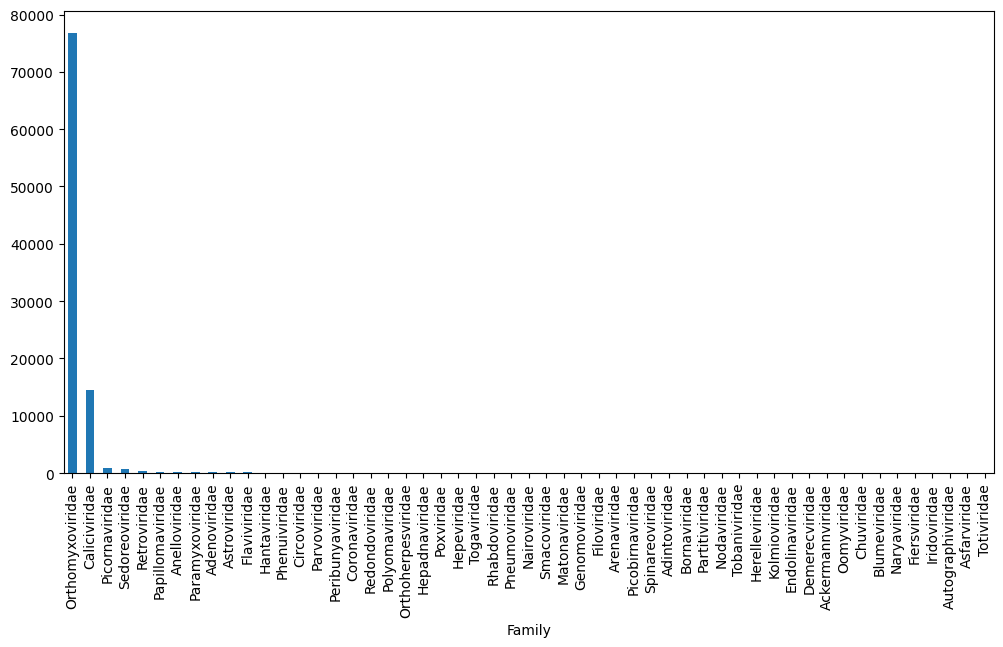

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/workspaces/BioRiskEval/attack/data/ft_dataset/ncbi_virus_full.csv")
# df = pd.read_csv("/workspaces/BioRiskEval/attack/data/ft_dataset/ncbi_virus_deduplicated.csv")

# df = df[df["Family"].notna()]

df.head()

# Get unique families and split them
unique_families = df['Family'].dropna().unique()
#draw bin chart based on family 
family_counts = df['Family'].value_counts()
print(family_counts)
family_counts.plot(kind='bar', figsize=(12, 6))
plt.show()

# Species Distribution

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# df = pd.read_csv("/workspaces/BioRiskEval/attack/data/ft_dataset/ncbi_virus_deduplicated.csv")
df = pd.read_csv("/workspaces/BioRiskEval/attack/data/ft_dataset/ncbi_virus_deduplicated_caliciviridae.csv")
df.head()

# Get unique families and split them
unique_species = df['Species'].dropna().unique()

#draw bin chart based on species 
species_counts = df['Species'].value_counts()
print(species_counts)
# species_counts.plot(kind='bar', figsize=(120, 6))
# plt.show()

df = pd.read_csv("/workspaces/BioRiskEval/attack/data/ft_dataset/ncbi_virus_full.csv")
df.head()

# Get unique families and split them
unique_species = df['Species'].dropna().unique()

#draw bin chart based on species 
species_counts = df['Species'].value_counts()
print(species_counts)
# species_counts.plot(kind='bar', figsize=(120, 6))
# plt.show()

Species
Norwalk virus                                     13388
Sapporo virus                                      1023
Sapovirus sapporoense                                31
Norovirus norwalkense                                31
Sapovirus Hu/Pune/NIV1044610/2010/India               1
Sapovirus Hu/Pune/NIV085334/2008/India                1
Sapovirus Hu/Pune/NIV089309/2008/India                1
Sapovirus Hu/Pune/NIV091094/2009/India                1
Sapovirus Hu/Pune/NIV0916007/2009/India               1
Sapovirus Hu/Pune/NIV094581/2009/India                1
Sapovirus Hu/Pune/NIV1031131/2010/India               1
Caliciviridae Hu/GII.4/Xiamen/May0511/2010/CHN        1
Sapovirus Hu/Pune/NIV083518/2008/India                1
Sapovirus Hu/Pune/NIV117296/2011/India                1
Sapovirus Hu/Pune/NIV117298/2011/India                1
Sapovirus Hu/Pune/NIV117301/2011/India                1
Sapovirus Sapozj-9                                    1
Sapovirus sp.                           

/tmp/ipykernel_650723/551081960.py:18: DtypeWarning: Columns (2,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/workspaces/BioRiskEval/attack/data/ft_dataset/ncbi_virus_full.csv")


Species
Severe acute respiratory syndrome-related coronavirus    6653943
Betacoronavirus pandemicum                               2467479
Human immunodeficiency virus 1                           1016932
Alphainfluenzavirus influenzae                            747854
Hepacivirus hominis                                       173911
                                                          ...   
Bufavirus-2                                                    1
Tusavirus sp.                                                  1
Redondovirus 4                                                 1
Cyclovirus manusyan                                            1
Pararubulavirus sosugaense                                     1
Name: count, Length: 1720, dtype: int64


# Select Single Family

In [3]:
# find all examples with family "Caliciviridae"

df = pd.read_csv("/workspaces/BioRiskEval/attack/data/ft_dataset/ncbi_virus_deduplicated.csv")
orthomyxoviridae_df = df[df['Family'] == 'Caliciviridae']
orthomyxoviridae_df.head()

# The rest of the data is used for the test set
orthomyxoviridae_df.to_csv("/workspaces/BioRiskEval/attack/data/ft_dataset/ncbi_virus_deduplicated_caliciviridae.csv", index=False)

# Download Gene Sequences from NCBI

In [2]:
import os
import pandas as pd
import subprocess
import time


# Function to download sequences in batches
def download_sequences_batch(accession_list, batch_size=500, output_dir="ncbi_downloads"):
    """
    Download sequences from NCBI using the datasets command in batches.
    
    Parameters:
    - accession_list: List of accession IDs
    - batch_size: Number of accessions to download per batch
    - output_dir: Directory to store the downloaded data
    """
    
    # Convert to absolute path and create output directory if it doesn't exist
    
    os.makedirs(output_dir, exist_ok=True)
    
    # Process in batches to avoid command line length limits
    total_batches = (len(accession_list) + batch_size - 1) // batch_size
    
    print(f"\nProcessing {len(accession_list)} accessions in {total_batches} batches...")
    
    for i in range(0, len(accession_list), batch_size):
        batch_num = i // batch_size + 1
        batch = accession_list[i:i + batch_size]
        
        # Join accession IDs with spaces for the command
        accession_string = " ".join(batch)
        
        # Construct the datasets command
        cmd = f"/workspaces/BioRiskEval/attack/data/datasets download virus genome accession {accession_string}"
        
        print(f"\nBatch {batch_num}/{total_batches}: Downloading {len(batch)} sequences...")
        
        try:
            # Execute the command
            result = subprocess.run(cmd, shell=True, capture_output=True, text=True, cwd=output_dir)
            
            if result.returncode == 0:
                print(f"✓ Batch {batch_num} downloaded successfully")
                
                # rename the zip file from ncbi_dataset.zip to batch_{batch_num}.zip
                source_zip = os.path.abspath(os.path.join(output_dir, "ncbi_dataset.zip"))
                dest_zip = os.path.abspath(os.path.join(output_dir, f"batch_{batch_num}.zip"))
                os.rename(source_zip, dest_zip)
                
                # Unzip the downloaded file with overwrite flag to avoid prompts
                zip_path = dest_zip
                if os.path.exists(zip_path):
                    # Use -o flag to overwrite without prompting, -q for quiet mode
                    unzip_cmd = f"unzip -o -q {zip_path}"
                    subprocess.run(unzip_cmd, shell=True, cwd=output_dir)
                    print(f"✓ Batch {batch_num} extracted")
                    
                    # Remove the zip file to save space
                    os.remove(zip_path)
                    source_folder = os.path.abspath(os.path.join(output_dir, f"ncbi_dataset"))
                    dest_folder = os.path.abspath(os.path.join(output_dir, f"batch_{batch_num}"))
                    os.rename(source_folder, dest_folder)
                else:
                    print(f"⚠️ Warning: Expected zip file not found for batch {batch_num}")
                
            else:
                print(f"✗ Error downloading batch {batch_num}: {result.stderr}")
                
        except Exception as e:
            print(f"✗ Exception occurred for batch {batch_num}: {str(e)}")
        
        # Small delay between batches to be respectful to the server
        if batch_num < total_batches:
            time.sleep(2)
    
    print(f"\n✓ Download process completed. Check the '{output_dir}' directory for results.")
    
    # List the contents of the output directory
    print(f"\nContents of {output_dir}:")
    for item in os.listdir(output_dir):
        item_path = os.path.join(output_dir, item)
        if os.path.isdir(item_path):
            print(f"  📁 {item}/")
        else:
            print(f"  📄 {item}")

def merge_all_batches(base_dir="/workspaces/BioRiskEval/attack/ncbi_downloads_all"):
    # find all the batch folders in the base_dir
    batch_folders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f)) and f.startswith("batch_")]
    batch_folders.sort()  # Sort to ensure consistent order
    print(f"Found {len(batch_folders)} batch folders")
    print(f"Batch folders: {batch_folders}")
    # merge all the .fna files into one fna file
    for batch_folder in batch_folders:
        batch_dir = os.path.join(base_dir, batch_folder, "data")
        fna_files = [f for f in os.listdir(batch_dir) if f.endswith(".fna")]
        print(f"Found {len(fna_files)} .fna files in {batch_folder}")
        # merge all the .fna files into one fna file
        with open(os.path.join(base_dir, "merged.fna"), "a") as outfile:
            for fna_file in fna_files:
                with open(os.path.join(batch_dir, fna_file), "r") as infile:
                    outfile.write(infile.read())
        print(f"Merged {len(fna_files)} .fna files into {base_dir}/merged.fna")
    print("Done!")




In [4]:
# Read the test dataset
import pandas as pd
import os
# file_name = "sequences_test_60.csv"
for file_name in ["/workspaces/BioRiskEval/attack/data/ft_dataset/simplexvirus_exclude_human_alpha2.csv"]:
# file_name = "accession_id_USDA_virus.csv"
    df_test = pd.read_csv(file_name)

    # Extract accession IDs
    accession_ids = df_test['#Accession'].tolist()
    print(f"Total accession IDs: {len(accession_ids)}")

    # Show first 10 accession IDs as example
    print(f"First 10 accession IDs: {accession_ids[:10]}")

    print("\n" + "="*50)
    print("Downloading sequences")
    print("="*50)
    output_dir = f"ft_dataset/ncbi_downloads_{file_name.split('/')[-1].replace('.csv', '').replace('accession_id_', '')}"
    output_dir = os.path.abspath(output_dir)

    download_sequences_batch(accession_ids, batch_size=500, output_dir=output_dir)

    merge_all_batches(output_dir)


Total accession IDs: 2618
First 10 accession IDs: ['PV780002.1', 'PV780003.1', 'PV780004.1', 'PV780005.1', 'PV780006.1', 'PV749626.1', 'PV749627.1', 'PV726245.1', 'PV726246.1', 'PV689946.1']


Processing 2618 accessions in 6 batches...

Batch 1/6: Downloading 500 sequences...
✓ Batch 1 downloaded successfully
✓ Batch 1 extracted

Batch 2/6: Downloading 500 sequences...
✓ Batch 2 downloaded successfully
✓ Batch 2 extracted

Batch 3/6: Downloading 500 sequences...
✓ Batch 3 downloaded successfully
✓ Batch 3 extracted

Batch 4/6: Downloading 500 sequences...
✓ Batch 4 downloaded successfully
✓ Batch 4 extracted

Batch 5/6: Downloading 500 sequences...
✓ Batch 5 downloaded successfully
✓ Batch 5 extracted

Batch 6/6: Downloading 118 sequences...
✓ Batch 6 downloaded successfully
✓ Batch 6 extracted

✓ Download process completed. Check the '/workspaces/BioRiskEval/attack/data/ft_dataset/ncbi_downloads_simplexvirus_exclude_human_alpha2' directory for results.

Contents of /workspaces/BioRisk

# Preprocess training data

In [5]:
# !rm -rf /workspaces/BioRiskEval/attack/data/ft_dataset/preprocessed_ncbi_virus_train_set_caliciviridae
# !preprocess_evo2 --config preprocess_config/ecoli_full_exclude_straboviridae.yaml
!preprocess_evo2 --config preprocess_config/simplexvirus_exclude_human_alpha2.yaml

[NeMo I 2025-08-18 16:54:04 nemo_logging:393] Using byte-level tokenization
[NeMo I 2025-08-18 16:54:04 nemo_logging:393] Created temporary binary datasets: /workspaces/BioRiskEval/attack/data/ft_dataset/preprocessed_simplexvirus_exclude_human_alpha2/simplexvirus_exclude_human_alpha2_uint8_distinct_byte-level_train.bin.tmp /workspaces/BioRiskEval/attack/data/ft_dataset/preprocessed_simplexvirus_exclude_human_alpha2/simplexvirus_exclude_human_alpha2_uint8_distinct_byte-level_val.bin.tmp /workspaces/BioRiskEval/attack/data/ft_dataset/preprocessed_simplexvirus_exclude_human_alpha2/simplexvirus_exclude_human_alpha2_uint8_distinct_byte-level_test.bin.tmp
Processed 1000 sequences
Number of train sequences: 882
Number of val sequences: 66
Number of test sequences: 52
Processed 2000 sequences
Number of train sequences: 1790
Number of val sequences: 116
Number of test sequences: 94
Processed 3000 sequences
Number of train sequences: 2694
Number of val sequences: 174
Number of test sequences: 13

# Dataset Length Distribution Analysis

file_name: /workspaces/BioRiskEval/attack/data/ft_dataset/ncbi_virus_deduplicated_orthomyxoviridae_train.fna, Number of examples: 1250


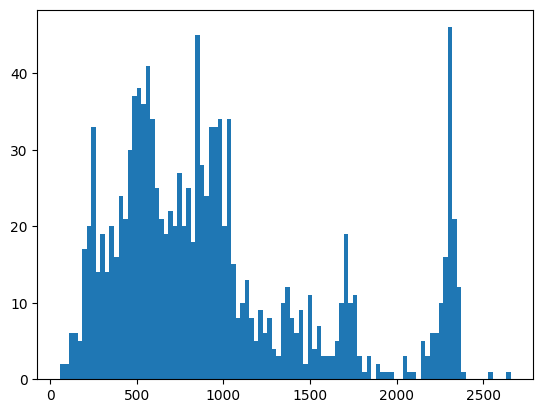

file_name: /workspaces/BioRiskEval/attack/data/ft_dataset/ncbi_downloads_ncbi_virus_deduplicated_orthomyxoviridae/merged.fna, Number of examples: 76759


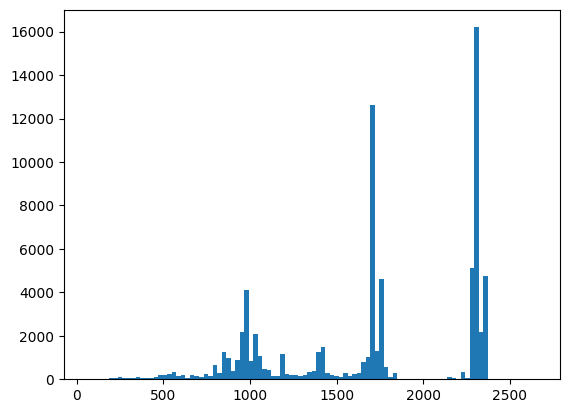

In [29]:
# Read the fna file and compute the length distribution

from Bio import SeqIO

fna_file_list = [
    # "/workspaces/BioRiskEval/attack/data/ncbi_downloads_sequences_test_60/merged.fna",
    # "/workspaces/BioRiskEval/attack/data/ncbi_downloads_sequences_train_40/merged.fna",
    # "/workspaces/BioRiskEval/attack/data/ncbi_downloads_jailbreakdnabench_nonpatho/merged.fna",
    # "/workspaces/BioRiskEval/attack/data/ncbi_downloads_jailbreakdnabench_patho/merged.fna",
    # "/workspaces/BioRiskEval/attack/data/ncbi_downloads_USDA_virus/merged.fna",
    # "/workspaces/BioRiskEval/attack/data/prokaryotic_host_sequences.fna"
    "/workspaces/BioRiskEval/attack/data/ft_dataset/ncbi_virus_deduplicated_orthomyxoviridae_train.fna",
    "/workspaces/BioRiskEval/attack/data/ft_dataset/ncbi_downloads_ncbi_virus_deduplicated_orthomyxoviridae/merged.fna"
]



for fna_file in fna_file_list:
    seqs = []
    for record in SeqIO.parse(fna_file, "fasta"):
        seqs.append(str(record.seq))

    print(f"file_name: {fna_file}, Number of examples: {len(seqs)}")    


    import matplotlib.pyplot as plt
    import numpy as np

    lengths = [len(seq) for seq in seqs]

    plt.hist(lengths, bins=100)
    plt.show()







In [2]:
# drop entries with no Family label
import pandas as pd
df = pd.read_csv("/workspaces/BioRiskEval/attack/data/ft_dataset/ncbi_virus_deduplicated.csv")

df = df[df["Family"].notna()]

df.to_csv("/workspaces/BioRiskEval/attack/data/ft_dataset/ncbi_virus_deduplicated.csv", index=False)






/tmp/ipykernel_3818087/4243114929.py:7: DtypeWarning: Columns (2,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/workspaces/BioRiskEval/attack/data/ft_dataset/ncbi_virus_full.csv")


Min length: 5, Max length: 32000


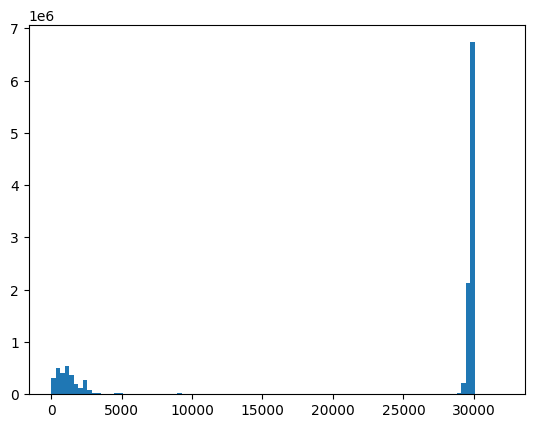

In [1]:
# length distribution
import pandas as pd
import matplotlib.pyplot as plt


# df = pd.read_csv("/workspaces/BioRiskEval/attack/data/ft_dataset/ncbi_virus_deduplicated.csv")
df = pd.read_csv("/workspaces/BioRiskEval/attack/data/ft_dataset/ncbi_virus_full.csv")

plt.hist(df["Length"], bins=100)
print(f"total number of sequences: {len(df)}")
print(f"Min length: {df['Length'].min()}, Max length: {df['Length'].max()}")
plt.show()

# # drop entries with no Family label
# df = df[df["Family"].notna()]
# df.to_csv("/workspaces/BioRiskEval/attack/data/ft_dataset/ncbi_virus_deduplicated_no_na.csv", index=False)






# FNA File deduplication

In [1]:
source_file="/workspaces/BioRiskEval/attack/data/ft_dataset/ncbi_downloads_ncbi_virus_deduplicated/merged.fna"
target_file="/workspaces/BioRiskEval/attack/data/ft_dataset/ncbi_downloads_ncbi_virus_deduplicated/merged_cleaned.fna"
seqkit rmdup -s $source_file -o $target_file

SyntaxError: invalid syntax (148267739.py, line 3)

In [ ]:
# simplify csv file based on the cleaned fasta file
import pandas as pd
from Bio import SeqIO
from tqdm import tqdm

orig_csv_file = "/workspaces/BioRiskEval/attack/data/raw_dataset/ncbi_virus_full.csv"
new_csv_file = "/workspaces/BioRiskEval/attack/data/raw_dataset/ncbi_virus_full_seq_deduplicated.csv"

# read the original csv file
df = pd.read_csv(orig_csv_file)

# read the cleaned fasta file
fna_file = "/workspaces/BioRiskEval/attack/data/raw_dataset/AllNucleotide_cleaned.fa"
seq_ids = []
for record in tqdm(SeqIO.parse(fna_file, "fasta")):
    seq_ids.append(str(record.id))

# only keep the sequences that are in the cleaned fasta file
df = df[df["Accession"].isin(seq_ids)]

# save the new csv file
df.to_csv(new_csv_file, index=False)
